<h3 style="color:skyblue">Ali Morajjabi - 610300104</h3>
<hr><hr>

<h2 style="color:#00ff45">:::Orthogonal Regression:::</h2>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

<hr>
<h3 style="color:#bbff00">Section 1</h3>

In [10]:
def orthogonal_regression(x, y):

    A = np.column_stack((x, y))
    m = len(x)
    e = np.ones(m).reshape(m, 1)
    I = np.eye(m)
    
    Q = A.T @ (I - e @ e.T / m) @ A
    
    eigenvalues, eigenvectors = np.linalg.eig(Q)
    
    direction_vector = eigenvectors[np.argmin(eigenvalues)]

    slope = direction_vector[1] / direction_vector[0]
    print(slope)
    print(eigenvectors)
    intercept = np.mean(x) - slope * np.mean(y)
    
    return slope, intercept

In [5]:
def load_data(path):
    file = open(path).read().split('\n')
    lines = [line.split() for line in file]
    return [(eval(x[0]) , eval(x[1])) for x in lines]

In [6]:
def MSE(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

In [7]:
def MSA(X, Y, slope, intercept):
    orthogonal_distances = np.abs(-slope * X + Y - intercept) / np.sqrt(slope**2 + 1)
    msa = np.mean(orthogonal_distances ** 2)
    return msa

<hr>
<h3 style="color:#bbff00">Section 2</h3>

In [12]:
data1 = np.array(load_data("data/data1.txt"))

0.9044419877133566
[[-0.74165381 -0.67078285]
 [ 0.67078285 -0.74165381]]


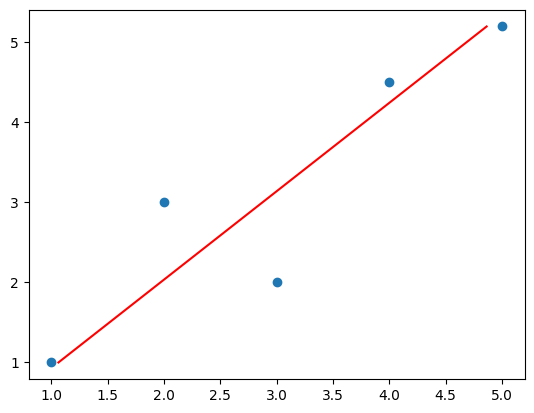

In [13]:
slope, intercept = orthogonal_regression(data1[:, 0], data1[:, 1])

x_vals = np.array([data1[:, 1].min(), data1[:, 1].max()])
y_vals = intercept + slope * x_vals

plt.scatter(data1[:, 0], data1[:, 1])
plt.plot(y_vals, x_vals, "red")
plt.show()

In [37]:
data2 = np.array(load_data("data/data2.txt"))

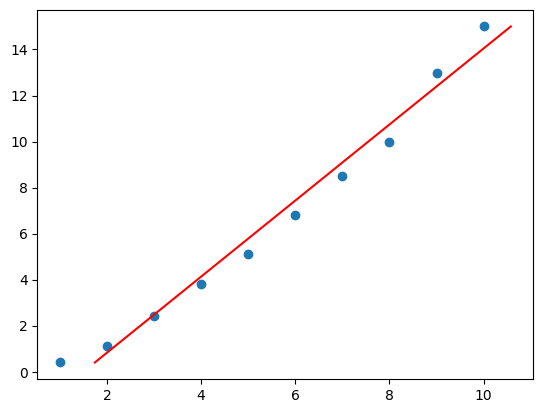

In [38]:
slope, intercept = orthogonal_regression(data2[:, 0], data2[:, 1])

x_vals = np.array([data2[:, 1].min(), data2[:, 1].max()])
y_vals = intercept + slope * x_vals

plt.scatter(data2[:, 0], data2[:, 1])
plt.plot(y_vals, x_vals, "red")
plt.show()

<hr>
<h3 style="color:#bbff00">Section 3</h3>

In [39]:
data = pd.read_csv("boston.csv")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [40]:
def data_splitter(df:pd.DataFrame, training_rate:float, target_col:str) -> tuple:
    df_without_target = df.loc[:, ~df.columns.isin([target_col])]
    target = df.loc[:, target_col]

    # returns => train_feature, test_feature, train_target, test_target
    return train_test_split(df_without_target, target, train_size=training_rate)

In [41]:
x_train, x_test, y_train, y_test = data_splitter(data, 0.8, "MEDV")
data.shape, x_train.shape

((506, 14), (404, 13))

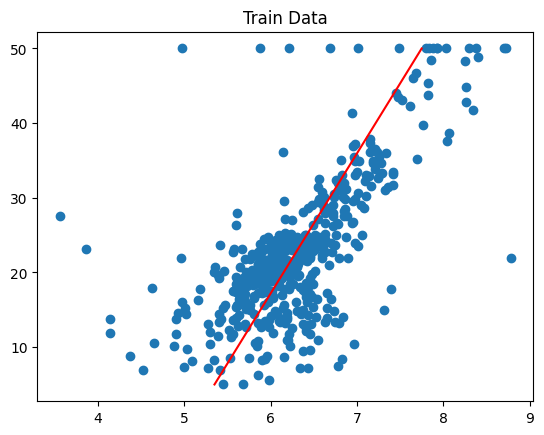

In [42]:
slope, intercept = orthogonal_regression(data["RM"], data["MEDV"])

x_vals = np.array([data["MEDV"].min(), data["MEDV"].max()])
y_vals = intercept + slope * x_vals

plt.scatter(data["RM"], data["MEDV"])
plt.plot(y_vals, x_vals, "red")
plt.title("Train Data")
plt.show()

In [43]:
# Prediction
pred_y = intercept + slope * x_test["RM"]

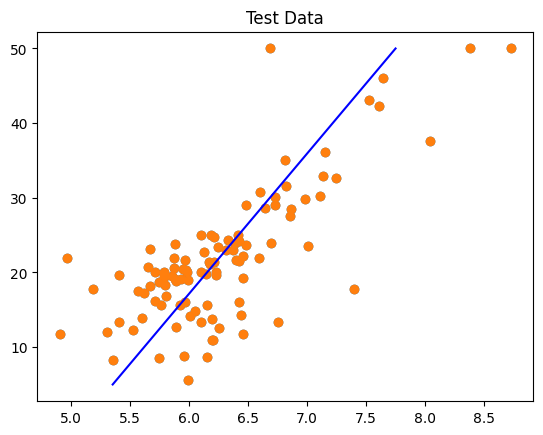

In [44]:
plt.scatter(x_test["RM"], y_test)
plt.scatter(x_test["RM"], y_test)
plt.plot(y_vals, x_vals, "blue")
plt.title("Test Data")
plt.show()

In [48]:
# MSE
MSE(y_test, pred_y)

349.33441611296973

In [49]:
# MSA
MSA(x_test["RM"], y_test, slope, intercept)

252.2498511626526

<hr>
<h3 style="color:#bbff00">Optional Section</h3>

(404, 1)
(102,)


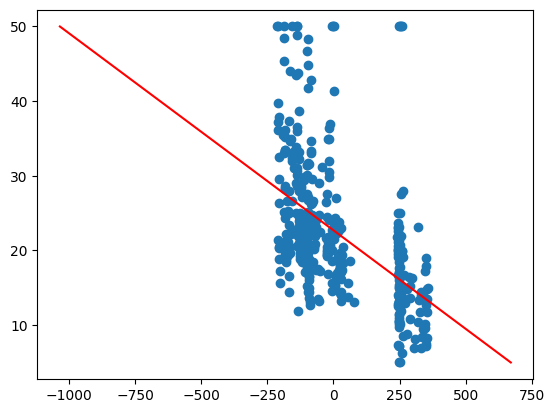

In [47]:
pca = PCA(n_components=1)
reduced_x_train = pca.fit_transform(x_train)

slope, intercept = orthogonal_regression(reduced_x_train, y_train)

x_vals = np.array([y_train.min(), y_train.max()])
y_vals = intercept + slope * x_vals

print(reduced_x_train.shape)
print(y_test.shape)


plt.scatter(reduced_x_train, y_train)
plt.plot(y_vals, x_vals, "red")
plt.show()